# Simple Linear Regression

The goal of this notebook is to demonstrate a linear regression model from the ground up using numpy.

In [1]:
from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

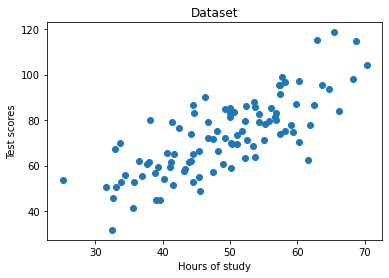

In [2]:
data = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(data[:,0])
y = array(data[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [3]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [4]:
def compute_cost(b, m, data):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(data))
    
    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

#### Define Gradient Descent functions

In [5]:
def step_gradient(b_current, m_current, data, alpha):
    """takes one step down towards the minima
    
    Args:
        b_current (float): current value of b
        m_current (float): current value of m
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size
    
    Returns:
        tuple: (b,m) new values of b,m
    """
    
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    """runs gradient descent
    
    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_m (float): initial value of m (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run
    
    Returns:
        list : the first and second item are b, m respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,m as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    m = starting_m
    
    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, data))
        b, m = step_gradient(b, m, array(data), learning_rate)
        b_progress.append(b)
        m_progress.append(m)
        
    return [b, m, cost_graph,b_progress,m_progress]

#### Run gradient_descent() to get optimized parameters b and m

In [6]:
b, m, cost_graph,b_progress,m_progress = gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, data))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 56.32792590749873


#### Plotting the cost per iterations

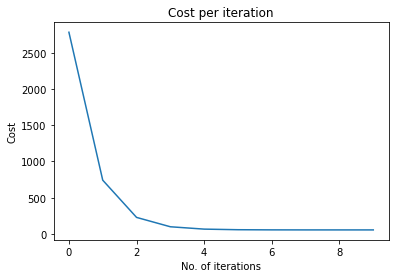

In [7]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

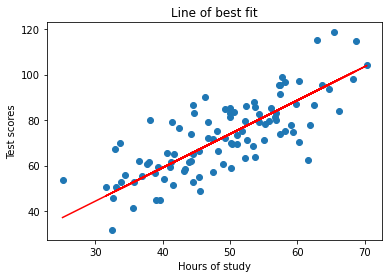

In [8]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()